In [1]:
import pandas as pd # pandas for data manipulation
import numpy as np # numpy for sure
import matplotlib.pyplot as plt

In [2]:
%%time
path = '/Users/Jeff/Documents/Insight/Data'
aisles = pd.read_csv(path+'/instacart_2017_05_01/aisles.csv')
departments = pd.read_csv(path+'/instacart_2017_05_01/departments.csv')
orders = pd.read_csv(path+'/instacart_2017_05_01/orders.csv')
order_products__prior = pd.read_csv(path+'/instacart_2017_05_01/order_products__prior.csv')
order_products__train = pd.read_csv(path+'/instacart_2017_05_01/order_products__train.csv')
products = pd.read_csv(path+'/instacart_2017_05_01/products.csv')

CPU times: user 9.68 s, sys: 3.5 s, total: 13.2 s
Wall time: 14.3 s


In [3]:
# visualize headers of all tables
table_names = ['aisles','departments','orders','order_products__prior','order_products__train','products']
for i,df in enumerate([aisles,departments,orders,order_products__prior,order_products__train,products]):
    print(table_names[i])
    print(len(df))
    display(df.head())

aisles
134


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


departments
21


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


orders
3421083


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


order_products__prior
32434489


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


order_products__train
1384617


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


products
49688


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


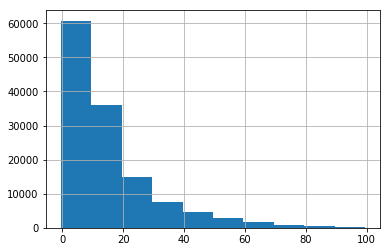

count    131209.000000
mean         16.603937
std          16.661077
min           4.000000
25%           6.000000
50%          10.000000
75%          20.000000
max         100.000000
Name: order_number, dtype: float64

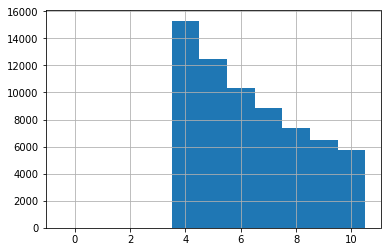

In [4]:
# how many orders per user? What is the distn?
display(orders.loc[orders['eval_set']=='train','order_number'].hist(bins=np.arange(-0.5,100.5,10)))
plt.show()
display(orders.loc[orders['eval_set']=='train','order_number'].hist(bins=np.arange(-0.5,11.5,1)))

display(orders.loc[orders['eval_set']=='train','order_number'].describe())
#mostly less than 20 orders per user, but still something like ~100k users are in that category.
#on low end, at least 4.

In [8]:
# Look at all aisles and departments
print(departments.values)
print(aisles.values)
# Departments are more like what I think of "aisles" (i.e., broad categories like "canned goods" or "snacks")
# Aisles are more specific groups within "aisles" (i.e., breakfast bars pastries, or hot cereal pancake mixes)

[[1 'frozen']
 [2 'other']
 [3 'bakery']
 [4 'produce']
 [5 'alcohol']
 [6 'international']
 [7 'beverages']
 [8 'pets']
 [9 'dry goods pasta']
 [10 'bulk']
 [11 'personal care']
 [12 'meat seafood']
 [13 'pantry']
 [14 'breakfast']
 [15 'canned goods']
 [16 'dairy eggs']
 [17 'household']
 [18 'babies']
 [19 'snacks']
 [20 'deli']
 [21 'missing']]
[[1 'prepared soups salads']
 [2 'specialty cheeses']
 [3 'energy granola bars']
 [4 'instant foods']
 [5 'marinades meat preparation']
 [6 'other']
 [7 'packaged meat']
 [8 'bakery desserts']
 [9 'pasta sauce']
 [10 'kitchen supplies']
 [11 'cold flu allergy']
 [12 'fresh pasta']
 [13 'prepared meals']
 [14 'tofu meat alternatives']
 [15 'packaged seafood']
 [16 'fresh herbs']
 [17 'baking ingredients']
 [18 'bulk dried fruits vegetables']
 [19 'oils vinegars']
 [20 'oral hygiene']
 [21 'packaged cheese']
 [22 'hair care']
 [23 'popcorn jerky']
 [24 'fresh fruits']
 [25 'soap']
 [26 'coffee']
 [27 'beers coolers']
 [28 'red wines']
 [29 'ho

In [3]:
%%time

#join previous order_ids by user to each order.
orders['user_id_order'] = orders['user_id']+0.001*orders['order_number']
orders['user_id_prevorder'] = orders['user_id']+0.001*(orders['order_number']-1)
# display(orders.head(13))
orders = orders.merge(orders[['order_id','user_id_order']].set_index('user_id_order'),
                     left_on='user_id_prevorder',right_on='user_id_order',
                     how='left',suffixes=('','_prev'))
# orders.loc[:,'order_id_prev'] = orders['order_id_prev'].astype('int64') #can't do this because some are NaNs
display(orders.head(13))

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,user_id_order,user_id_prevorder,order_id_prev
0,2539329,1,prior,1,2,8,NaN,1.001,1.000,NaN
1,2398795,1,prior,2,3,7,15.0,1.002,1.001,2539329.0
2,473747,1,prior,3,3,12,21.0,1.003,1.002,2398795.0
3,2254736,1,prior,4,4,7,29.0,1.004,1.003,473747.0
4,431534,1,prior,5,4,15,28.0,1.005,1.004,2254736.0
5,3367565,1,prior,6,2,7,19.0,1.006,1.005,431534.0
6,550135,1,prior,7,1,9,20.0,1.007,1.006,3367565.0
7,3108588,1,prior,8,1,14,14.0,1.008,1.007,550135.0
8,2295261,1,prior,9,1,16,0.0,1.009,1.008,3108588.0
9,2550362,1,prior,10,4,8,30.0,1.010,1.009,2295261.0


CPU times: user 10 s, sys: 1.39 s, total: 11.4 s
Wall time: 11.5 s


In [4]:
products = products[['product_id','product_name','aisle_id','department_id']]
#add a column for whether an item is organic or not:
def return_organic(prod_name):
    if 'organic' in prod_name.lower():
        return 1
    else:
        return 0
    
products['organic'] = products['product_name'].map(return_organic)

#also merge aisle and department names
products = products.merge(aisles,on='aisle_id')
products = products.merge(departments,on='department_id')
products.loc[:,'organic_produce'] = 0
products.loc[(products['organic']==1) & (products['department']=='produce') ,
         'organic_produce'] = 1
display(products.sample(20))
display(products.loc[products['organic_produce']==1].sample(10))
# products.to_csv('products_organic.csv')

,product_id,product_name,aisle_id,department_id,organic,aisle,department,organic_produce
46427,18864,Chili,1,20,0,prepared soups salads,deli,0
31264,29973,"Non-Aerosol Original Spray Starch Plus, Fresh ...",75,17,0,laundry,household,0
7612,14288,Gluten Free Cinnamon Roll Mix,105,13,0,doughs gelatins bake mixes,pantry,0
36948,49626,Cube Stuffing,4,9,0,instant foods,dry goods pasta,0
21388,18764,The Very Finest Fish Oil Lemon Flavor,47,11,0,vitamins supplements,personal care,0
22065,2571,Advanced Repair Fragrance Free Lotion,127,11,0,body lotions soap,personal care,0
4598,17135,"Nuggets Assortment, Family Bag",45,19,0,candy chocolate,snacks,0
16524,29582,Green Chile & Cheese Pupusas,38,1,0,frozen meals,frozen,0
14434,16676,Vanilla Sparkling Energy Water,64,7,0,energy sports drinks,beverages,0
27672,11306,Mild Switzerland Le Gruyere Cheese,2,16,0,specialty cheeses,dairy eggs,0


,product_id,product_name,aisle_id,department_id,organic,aisle,department,organic_produce
41959,18135,Organic Zucchini Squash,83,4,1,fresh vegetables,produce,1
42353,5876,Organic Lemon,24,4,1,fresh fruits,produce,1
41140,601,Organic Crunchy Slaw Americana Salad,123,4,1,packaged vegetables fruits,produce,1
41992,21113,Potato Red Bag 2 Lb Organic,83,4,1,fresh vegetables,produce,1
41948,16751,"Organic Baby Sweet Potatoes, Microwaveable",83,4,1,fresh vegetables,produce,1
42654,45146,Organic Gold Pineapple,24,4,1,fresh fruits,produce,1
41911,13629,Organic Snipped Green Beans,83,4,1,fresh vegetables,produce,1
41826,7079,Organic Alfalfa Sprouts,83,4,1,fresh vegetables,produce,1
41197,5130,Organic Herb Blend,123,4,1,packaged vegetables fruits,produce,1
42263,45007,Organic Zucchini,83,4,1,fresh vegetables,produce,1


In [45]:
display(aisles.loc[aisles['aisle_id']==94])
display(departments.loc[departments['department_id']==7])
#merge worked correctly!

,aisle_id,aisle
93,94,tea


,department_id,department
6,7,beverages


In [5]:
# how many organic products are in the dataset:
products_org = products.loc[products['organic']==1]
display(products_org)
# ~5000 organic products, out of ~50000

# NOTE product_id column is one off from pandas index. So must not join to other tables by index!

,product_id,product_name,aisle_id,department_id,organic,aisle,department,organic_produce
5,331,Organic Lemon Gingersnap,61,19,1,cookies cakes,snacks,0
18,1129,Organic Family Recipe Chocolate Chip Cookies,61,19,1,cookies cakes,snacks,0
34,2023,Organic Stawberry Shortcake Sandwich Cookies,61,19,1,cookies cakes,snacks,0
73,3769,Organic Mini Peanut Butter Crackers,61,19,1,cookies cakes,snacks,0
114,6028,Organic Matcha Cooking Grade,61,19,1,cookies cakes,snacks,0
...,...,...,...,...,...,...,...,...
49675,47489,Organic Brown Jasmine Rice,68,10,1,bulk grains rice dried goods,bulk,0
49678,10224,Organic Hunza Golden Raisins,18,10,1,bulk dried fruits vegetables,bulk,0
49681,14665,Organic White Popcorn,18,10,1,bulk dried fruits vegetables,bulk,0
49682,19628,Organic Blueberries Package,18,10,1,bulk dried fruits vegetables,bulk,0


In [5]:
#combine order_products__train and __prior
order_products_combined = order_products__train.append(order_products__prior,sort=False)
display(order_products_combined.sample(10))
print(len(order_products_combined))

,order_id,product_id,add_to_cart_order,reordered
8445372,891467,45066,7,0
30569388,3224390,13780,10,0
16648567,1756088,45570,7,0
4641792,489855,43218,1,0
9106588,961404,48068,7,0
22718852,2396304,45774,3,0
12680512,1338351,980,2,0
2727795,287829,42562,5,1
8197868,865328,28051,10,1
6005424,633901,45495,16,1


33819106


In [6]:
%%time
#join product name and organic status to products in orders
order_products = order_products__train #work on prior only for now (only past orders)
# order_products = order_products__prior #work on train only for now (only most recent orders)
# order_products = order_products_combined #work on train only for now (only most recent orders)
order_products = order_products[['order_id','product_id','add_to_cart_order','reordered']]
order_products = order_products.merge(products,on='product_id')
display(order_products.head(20))

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,organic,aisle,department,organic_produce
0,1,49302,1,1,Bulgarian Yogurt,120,16,0,yogurt,dairy eggs,0
1,816049,49302,7,1,Bulgarian Yogurt,120,16,0,yogurt,dairy eggs,0
2,1242203,49302,1,1,Bulgarian Yogurt,120,16,0,yogurt,dairy eggs,0
3,1383349,49302,11,1,Bulgarian Yogurt,120,16,0,yogurt,dairy eggs,0
4,1787378,49302,8,0,Bulgarian Yogurt,120,16,0,yogurt,dairy eggs,0
5,2445303,49302,2,1,Bulgarian Yogurt,120,16,0,yogurt,dairy eggs,0
6,2853065,49302,12,1,Bulgarian Yogurt,120,16,0,yogurt,dairy eggs,0
7,3231517,49302,6,1,Bulgarian Yogurt,120,16,0,yogurt,dairy eggs,0
8,1,11109,2,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,1,other creams cheeses,dairy eggs,0
9,68474,11109,8,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,1,other creams cheeses,dairy eggs,0


CPU times: user 387 ms, sys: 122 ms, total: 508 ms
Wall time: 520 ms


In [13]:
display(order_products.loc[order_products['organic']==1].head(8)) # did join work?

# Double check specific items to make sure join worked.
display(products_org.loc[products_org['product_id']==33120])
display(products_org.loc[products_org['product_id']==11109])
display(products_org.loc[products_org['product_id']==49302]) #not organic so shouldn't up here.

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,organic,aisle,department
8,1,11109,2,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,1,other creams cheeses,dairy eggs
9,68474,11109,8,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,1,other creams cheeses,dairy eggs
10,78197,11109,3,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,1,other creams cheeses,dairy eggs
11,120619,11109,1,0,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,1,other creams cheeses,dairy eggs
12,128666,11109,12,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,1,other creams cheeses,dairy eggs
13,153973,11109,10,0,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,1,other creams cheeses,dairy eggs
14,193761,11109,2,0,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,1,other creams cheeses,dairy eggs
15,213799,11109,6,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,1,other creams cheeses,dairy eggs


,product_id,product_name,aisle_id,department_id,organic,aisle,department
29978,33120,Organic Egg Whites,86,16,1,eggs,dairy eggs


,product_id,product_name,aisle_id,department_id,organic,aisle,department
28799,11109,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,1,other creams cheeses,dairy eggs


,product_id,product_name,aisle_id,department_id,organic,aisle,department


In [14]:
display(order_products.loc[order_products['order_id']==98]) # what's going on with order 98? (train df only)
display(order_products.loc[order_products['order_id']==2]) # what's going on with order 98? (prior df only)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,organic,aisle,department
3652,98,13176,4,1,Bag of Organic Bananas,24,4,1,fresh fruits,produce
56472,98,27966,13,1,Organic Raspberries,123,4,1,packaged vegetables fruits,produce
68196,98,8859,1,1,Natural Spring Water,115,7,0,water seltzer sparkling water,beverages
69146,98,19731,2,1,Organic Orange Juice With Calcium & Vitamin D,31,7,1,refrigerated,beverages
69256,98,43654,3,1,Whole Milk Greek Blended Vanilla Bean Yogurt,120,16,0,yogurt,dairy eggs
69426,98,4357,5,1,Organic Chocolate Almondmilk Pudding,71,16,1,refrigerated pudding desserts,dairy eggs
69570,98,37664,6,1,Organic Sliced Provalone Cheese,21,16,1,packaged cheese,dairy eggs
69664,98,34065,7,1,"Tomatoes, Crushed, Organic",81,15,1,canned jarred vegetables,canned goods
69698,98,35951,8,1,Organic Unsweetened Almond Milk,91,16,1,soy lactosefree,dairy eggs
71874,98,43560,9,1,"Crackers, Oyster",78,19,0,crackers,snacks


,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,organic,aisle,department


In [28]:
# what is the frequency of the top products
X=200
topX_products = pd.DataFrame(order_products.loc[:,'product_id'].value_counts().head(200))
topX_products.reset_index(inplace=True)
topX_products.columns = ['product_id','frequency']
topX_products = topX_products.merge(products[['product_id','product_name']],on='product_id')
topX_products['organic'] = topX_products['product_name'].map(return_organic)
display(topX_products)
print(topX_products['organic'].value_counts())
# topX_products.to_csv('top200_products.csv')

,product_id,frequency,product_name,organic
0,24852,18726,Banana,0
1,13176,15480,Bag of Organic Bananas,1
2,21137,10894,Organic Strawberries,1
3,21903,9784,Organic Baby Spinach,1
4,47626,8135,Large Lemon,0
...,...,...,...,...
195,47734,785,Organic Green Cabbage,1
196,15937,778,Shallot,0
197,44910,777,Organic Spring Mix Salad,1
198,4562,773,English Seedless Cucumber,0


0    113
1     87
Name: organic, dtype: int64


In [7]:
# what is the frequency of each type of organic product (i.e., should we focus on one type?)
display(order_products.loc[order_products['organic']==1,'product_name'].value_counts().head(60))

#get top 50 items by frequency
organic_top50 = order_products.loc[order_products['organic']==1,'product_name'].value_counts()\
                    .head(50).index.values
display(organic_top50)
organic_top50_ids = order_products.loc[order_products['organic']==1,'product_id'].value_counts()\
                    .head(50).index.values
display(organic_top50_ids)

Bag of Organic Bananas                                            15480
Organic Strawberries                                              10894
Organic Baby Spinach                                               9784
Organic Avocado                                                    7409
Organic Hass Avocado                                               7293
Organic Raspberries                                                5546
Organic Blueberries                                                4966
Organic Whole Milk                                                 4908
Organic Cucumber                                                   4613
Organic Zucchini                                                   4589
Organic Yellow Onion                                               4290
Organic Garlic                                                     4158
Organic Grape Tomatoes                                             3823
Organic Red Onion                                               

array(['Bag of Organic Bananas', 'Organic Strawberries',
       'Organic Baby Spinach', 'Organic Avocado', 'Organic Hass Avocado',
       'Organic Raspberries', 'Organic Blueberries', 'Organic Whole Milk',
       'Organic Cucumber', 'Organic Zucchini', 'Organic Yellow Onion',
       'Organic Garlic', 'Organic Grape Tomatoes', 'Organic Red Onion',
       'Organic Baby Carrots', 'Organic Cilantro', 'Organic Lemon',
       'Organic Fuji Apple', 'Organic Baby Arugula',
       'Organic Large Extra Fancy Fuji Apple', 'Organic Blackberries',
       'Organic Gala Apples', 'Organic Half & Half',
       'Michigan Organic Kale', 'Organic Small Bunch Celery',
       'Organic Garnet Sweet Potato (Yam)', 'Organic Tomato Cluster',
       'Organic Peeled Whole Baby Carrots',
       'Organic Italian Parsley Bunch', 'Organic Red Bell Pepper',
       'Organic Granny Smith Apple', 'Organic Banana',
       'Apple Honeycrisp Organic', 'Organic Unsweetened Almond Milk',
       'Organic Ginger Root', 'Organic

array([13176, 21137, 21903, 47766, 47209, 27966, 39275, 27845, 30391,
       45007, 22935, 24964, 40706,  8518, 42265, 31717,  5876, 28204,
       21616, 19057, 26604, 37646, 49235, 28985, 44359, 48679, 41950,
       43961, 34126, 10749, 39877, 37067,  8277, 35951, 46667, 22035,
        8174, 22825, 39928, 18465, 27521, 16759,  9839, 27156,  5785,
       37687, 20995, 34243,  7781, 43789])

In [12]:
order_products.loc[order_products['organic']==1,'product_name'].value_counts().head(50)\
    .to_csv('top50_organic_items.csv',header=['num_items'])

In [12]:
#what is the frequency of each type of organic product
display(order_products.loc[order_products['organic']==1,'department'].value_counts().head(60))

produce            210560
dairy eggs          61737
canned goods        20564
snacks              18239
frozen              17054
pantry              16873
beverages           12778
dry goods pasta      9546
bakery               8200
deli                 7085
babies               6139
breakfast            5561
meat seafood         4541
missing              3238
international        1758
personal care         931
bulk                  630
other                  92
pets                   54
alcohol                26
household              11
Name: department, dtype: int64

In [13]:
#removing produce and dairy/eggs, what are the most frequent organic products?
display(order_products.loc[order_products['organic']==1,'aisle'].value_counts().head(60))

fresh fruits                  77632
fresh vegetables              73554
packaged vegetables fruits    48453
milk                          18010
fresh herbs                   10713
yogurt                        10683
eggs                          10065
frozen produce                 9294
soup broth bouillon            8424
packaged cheese                7375
soy lactosefree                6971
baby food formula              6136
canned jarred vegetables       5590
bread                          5505
canned meals beans             5182
refrigerated                   4657
juice nectars                  4564
cream                          3891
nuts seeds dried fruit         3432
chips pretzels                 3429
grains rice dried goods        3270
missing                        3238
crackers                       3049
other creams cheeses           2916
lunch meat                     2913
cereal                         2852
dry pasta                      2816
oils vinegars               

In [48]:
# what is the frequency of each type of aisle and department
display(order_products['aisle'].value_counts().head(50))
display(order_products['department'].value_counts().head(50))

#veggies and fruits are the most popular, which is good for the spoilage question.

fresh vegetables                 150609
fresh fruits                     150473
packaged vegetables fruits        78493
yogurt                            55240
packaged cheese                   41699
water seltzer sparkling water     36617
milk                              32644
chips pretzels                    31269
soy lactosefree                   26240
bread                             23635
refrigerated                      23228
ice cream ice                     22676
frozen produce                    22453
eggs                              19875
crackers                          19592
frozen meals                      18221
energy granola bars               17449
lunch meat                        16957
soft drinks                       16279
cereal                            16201
fresh herbs                       16052
fresh dips tapenades              15142
soup broth bouillon               15109
juice nectars                     14350
packaged produce                  13460


produce            409087
dairy eggs         217051
snacks             118862
beverages          114046
frozen             100426
pantry              81242
bakery              48394
canned goods        46799
deli                44291
dry goods pasta     38713
household           35986
meat seafood        30307
breakfast           29500
personal care       21570
babies              14941
international       11902
missing              8251
alcohol              5598
pets                 4497
other                1795
bulk                 1359
Name: department, dtype: int64

In [58]:
order_products.loc[order_products['product_name']=='Bag of Organic Bananas']

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,organic,aisle,department,organic_produce
3651,1,13176,6,0,Bag of Organic Bananas,24,4,1,fresh fruits,produce,1
3652,98,13176,4,1,Bag of Organic Bananas,24,4,1,fresh fruits,produce,1
3653,170,13176,3,1,Bag of Organic Bananas,24,4,1,fresh fruits,produce,1
3654,1077,13176,1,1,Bag of Organic Bananas,24,4,1,fresh fruits,produce,1
3655,1325,13176,2,1,Bag of Organic Bananas,24,4,1,fresh fruits,produce,1
...,...,...,...,...,...,...,...,...,...,...,...
19126,3420498,13176,8,0,Bag of Organic Bananas,24,4,1,fresh fruits,produce,1
19127,3420788,13176,1,1,Bag of Organic Bananas,24,4,1,fresh fruits,produce,1
19128,3420851,13176,1,1,Bag of Organic Bananas,24,4,1,fresh fruits,produce,1
19129,3420857,13176,3,1,Bag of Organic Bananas,24,4,1,fresh fruits,produce,1


In [8]:
# sum all the organic products in each order:
orders_organic = order_products[['order_id','organic','organic_produce']].groupby(['order_id']).sum()
orders_organic.sample(5)

,organic,organic_produce
order_id,,
2966989,1,0
2250346,1,0
3143788,0,0
2195683,1,1
1522726,11,6


In [9]:
# join organic status to orders table can use df.join() here because index is order_id above
orders_by_o = orders.join(orders_organic,on='order_id',rsuffix='2')

display(orders_by_o.loc[orders_by_o['eval_set']=='train'].head(20)) # check that join worked
# display(orders_by_o.head(20)) # for when original orders_products table is for all data, not just training data.

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,user_id_order,user_id_prevorder,order_id_prev,organic,organic_produce
10,1187899,1,train,11,4,8,14.0,1.011,1.010,2550362.0,3.0,0.0
25,1492625,2,train,15,1,11,30.0,2.015,2.014,839880.0,6.0,1.0
49,2196797,5,train,5,0,11,6.0,5.005,5.004,157374.0,5.0,3.0
74,525192,7,train,21,2,11,6.0,7.021,7.020,2452257.0,1.0,0.0
78,880375,8,train,4,1,14,10.0,8.004,8.003,2570360.0,9.0,7.0
82,1094988,9,train,4,6,10,30.0,9.004,9.003,1830137.0,6.0,1.0
88,1822501,10,train,6,0,19,30.0,10.006,10.005,1353310.0,0.0,0.0
115,1827621,13,train,13,0,21,8.0,13.013,13.012,1789302.0,1.0,0.0
129,2316178,14,train,14,2,19,11.0,14.014,14.013,3394109.0,0.0,0.0
200,2180313,17,train,41,3,10,30.0,17.041,17.040,3350883.0,0.0,0.0


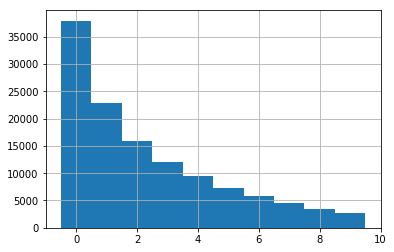

In [29]:
orders_by_o.loc[orders_by_o['eval_set']=='train','organic'].hist(bins=np.arange(-0.5,10.5,1))

In [10]:
# Predicting orders with organic items.
# Order-level. Categorize each order by whether or not it had an organic item or not, and see if we can predict organic carts.
orders_by_o['any_organic'] = orders_by_o['organic']>0
orders_by_o['any_organic_produce'] = orders_by_o['organic_produce']>0

orders_by_o['organic_non_produce'] = orders_by_o['organic'] - orders_by_o['organic_produce']
orders_by_o['any_organic_non_produce'] = orders_by_o['organic_non_produce']>0

display(orders_by_o.loc[orders_by_o['eval_set']=='train'].sample(20))

display(orders_by_o.loc[orders_by_o['eval_set']=='train','any_organic'].value_counts())
display(orders_by_o.loc[orders_by_o['eval_set']=='train','any_organic'].value_counts(normalize=True))

display(orders_by_o.loc[orders_by_o['eval_set']=='train','any_organic_produce'].value_counts())
display(orders_by_o.loc[orders_by_o['eval_set']=='train','any_organic_produce'].value_counts(normalize=True))

display(orders_by_o.loc[orders_by_o['eval_set']=='train','any_organic_non_produce'].value_counts())
display(orders_by_o.loc[orders_by_o['eval_set']=='train','any_organic_non_produce'].value_counts(normalize=True))

# Need to join a really long horizontal number of columns based off of every product and whether or not it exists in the order.

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,user_id_order,user_id_prevorder,order_id_prev,organic,organic_produce,any_organic,any_organic_produce,organic_non_produce,any_organic_non_produce
3129924,58692,188686,train,37,4,13,7.0,188686.037,188686.036,194762.0,3.0,1.0,True,True,2.0,True
2504477,1613769,150772,train,10,6,17,30.0,150772.010,150772.009,621690.0,0.0,0.0,False,False,0.0,False
2788206,142507,168143,train,8,4,11,13.0,168143.008,168143.007,1586512.0,1.0,1.0,True,True,0.0,False
3078702,4437,185652,train,12,6,9,30.0,185652.012,185652.011,2385633.0,2.0,1.0,True,True,1.0,True
3298974,955955,198825,train,7,2,17,30.0,198825.007,198825.006,1640776.0,6.0,6.0,True,True,0.0,False
274356,2314429,16589,train,17,2,8,30.0,16589.017,16589.016,337562.0,0.0,0.0,False,False,0.0,False
211020,641965,12755,train,35,5,7,8.0,12755.035,12755.034,3123564.0,6.0,3.0,True,True,3.0,True
2424148,596266,145871,train,31,3,10,3.0,145871.031,145871.030,1333082.0,1.0,0.0,True,False,1.0,True
2569948,2309644,154632,train,13,4,15,3.0,154632.013,154632.012,1734042.0,1.0,1.0,True,True,0.0,False
1537983,1231251,92379,train,16,2,14,29.0,92379.016,92379.015,2829461.0,2.0,0.0,True,False,2.0,True


True     93287
False    37922
Name: any_organic, dtype: int64

True     0.71098
False    0.28902
Name: any_organic, dtype: float64

True     72009
False    59200
Name: any_organic_produce, dtype: int64

True     0.548811
False    0.451189
Name: any_organic_produce, dtype: float64

True     73662
False    57547
Name: any_organic_non_produce, dtype: int64

True     0.56141
False    0.43859
Name: any_organic_non_produce, dtype: float64

In [11]:
# Get whether each order has one of the top 50 items

each_order = orders_by_o.loc[orders_by_o['eval_set'].map(lambda x: x in ['train'])] #train for now, but eventually all
display(each_order.head())
display(len(each_order))

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,user_id_order,user_id_prevorder,order_id_prev,organic,organic_produce,any_organic,any_organic_produce,organic_non_produce,any_organic_non_produce
10,1187899,1,train,11,4,8,14.0,1.011,1.010,2550362.0,3.0,0.0,True,False,3.0,True
25,1492625,2,train,15,1,11,30.0,2.015,2.014,839880.0,6.0,1.0,True,True,5.0,True
49,2196797,5,train,5,0,11,6.0,5.005,5.004,157374.0,5.0,3.0,True,True,2.0,True
74,525192,7,train,21,2,11,6.0,7.021,7.020,2452257.0,1.0,0.0,True,False,1.0,True
78,880375,8,train,4,1,14,10.0,8.004,8.003,2570360.0,9.0,7.0,True,True,2.0,True


131209

In [82]:
# add dummy columns for each of the top 50 organic foods so we can do a groupby.sum of these columns
order_products_top50 = order_products
for organic_top50_id in list(organic_top50_ids):
    order_products_top50[organic_top50_id] = order_products_top50['product_id']==organic_top50_id
    order_products_top50[organic_top50_id] = order_products_top50[organic_top50_id].astype(int)

display(order_products_top50.head())
display(order_products_top50.loc[order_products_top50['product_id']==27521]) #column 27521 is 1.

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,organic,aisle,department,...,27521,16759,9839,27156,5785,37687,20995,34243,7781,43789
0,1,49302,1,1,Bulgarian Yogurt,120,16,0,yogurt,dairy eggs,...,0,0,0,0,0,0,0,0,0,0
1,816049,49302,7,1,Bulgarian Yogurt,120,16,0,yogurt,dairy eggs,...,0,0,0,0,0,0,0,0,0,0
2,1242203,49302,1,1,Bulgarian Yogurt,120,16,0,yogurt,dairy eggs,...,0,0,0,0,0,0,0,0,0,0
3,1383349,49302,11,1,Bulgarian Yogurt,120,16,0,yogurt,dairy eggs,...,0,0,0,0,0,0,0,0,0,0
4,1787378,49302,8,0,Bulgarian Yogurt,120,16,0,yogurt,dairy eggs,...,0,0,0,0,0,0,0,0,0,0


,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,organic,aisle,department,...,27521,16759,9839,27156,5785,37687,20995,34243,7781,43789
286926,1468,27521,7,1,Organic Lacinato (Dinosaur) Kale,83,4,1,fresh vegetables,produce,...,1,0,0,0,0,0,0,0,0,0
286927,3484,27521,21,1,Organic Lacinato (Dinosaur) Kale,83,4,1,fresh vegetables,produce,...,1,0,0,0,0,0,0,0,0,0
286928,4468,27521,3,1,Organic Lacinato (Dinosaur) Kale,83,4,1,fresh vegetables,produce,...,1,0,0,0,0,0,0,0,0,0
286929,4680,27521,7,1,Organic Lacinato (Dinosaur) Kale,83,4,1,fresh vegetables,produce,...,1,0,0,0,0,0,0,0,0,0
286930,4827,27521,16,1,Organic Lacinato (Dinosaur) Kale,83,4,1,fresh vegetables,produce,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288682,3415254,27521,9,0,Organic Lacinato (Dinosaur) Kale,83,4,1,fresh vegetables,produce,...,1,0,0,0,0,0,0,0,0,0
288683,3415641,27521,4,1,Organic Lacinato (Dinosaur) Kale,83,4,1,fresh vegetables,produce,...,1,0,0,0,0,0,0,0,0,0
288684,3417172,27521,8,1,Organic Lacinato (Dinosaur) Kale,83,4,1,fresh vegetables,produce,...,1,0,0,0,0,0,0,0,0,0
288685,3417828,27521,7,1,Organic Lacinato (Dinosaur) Kale,83,4,1,fresh vegetables,produce,...,1,0,0,0,0,0,0,0,0,0


In [85]:
# for each top50_organic item, sum all of that item in each order and merge to each_order df
orders_top50_id = order_products_top50[['order_id']+list(organic_top50_ids)].groupby(['order_id']).sum()
display(orders_top50_id)

,13176,21137,21903,47766,47209,27966,39275,27845,30391,45007,...,27521,16759,9839,27156,5785,37687,20995,34243,7781,43789
order_id,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96,0,0,0,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
98,1,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3421049,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3421056,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3421058,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [106]:
%%time

sample_order_id = 3421056 # check this order

# get aisles and departments for orders in train
order_by_aisle = pd.DataFrame(order_products.groupby(['order_id'])['aisle'].value_counts())
display(order_by_aisle.head(10))

order_by_aisle = order_by_aisle.unstack(fill_value=0)
display(order_by_aisle)
#check that the unstacking worked:
display(order_by_aisle.loc[sample_order_id].sort_values(ascending=False).head(10)) #order_id=1

#repeat with 21 departments
order_by_dept = pd.DataFrame(order_products.groupby(['order_id'])['department'].value_counts())
display(order_by_dept.head(10))

order_by_dept = order_by_dept.unstack(fill_value=0)
display(order_by_dept)
#check that the unstacking worked:
display(order_by_dept.loc[sample_order_id].sort_values(ascending=False).head(10)) #order_id=1


aisle
order_id aisle                      
1        fresh fruits              2
         fresh vegetables          2
         canned meat seafood       1
         other creams cheeses      1
         packaged cheese           1
         yogurt                    1
36       fresh vegetables          2
         cream                     1
         eggs                      1
         lunch meat                1

aisle                               \
aisle    air fresheners candles asian foods baby accessories   
order_id                                                       
1                             0           0                0   
36                            0           0                0   
38                            0           0                0   
96                            0           0                0   
98                            0           0                0   
...                         ...         ...              ...   
3421049                       0           0                0   
3421056                       0           0                0   
3421058                       0           0                0   
3421063                       0           0                0   
3421070                       0           0                0   

                                                                \
aisle    baby bath body care baby food formula bakery desserts   
order_id                                                         
1                          0                 0               0   
36                         0                 0               0   
38                         0                 0               0   
96                         0                 0               0   
98                         0                 0               0   
...                      ...               ...             ...   
3421049                    0                 0               0   
3421056                    0                 0               0   
3421058                    0                 0               0   
3421063                    0                 0               0   
3421070                    0                 0               0   

                                                                        ...  \
aisle    baking ingredients baking supplies decor beauty beers coolers  ...   
order_id                                                                ...   
1                         0                     0      0             0  ...   
36                        0                     0      0             0  ...   
38                        0                     0      0             0  ...   
96                        0                     0      0             0  ...   
98                        2                     0      0             0  ...   
...                     ...                   ...    ...           ...  ...   
3421049                   0                     0      0             0  ...   
3421056                   0                     0      0             0  ...   
3421058                   0                     0      0             0  ...   
3421063                   0                     0      0             0  ...   
3421070                   0                     0      0             0  ...   

                                                                  \
aisle    spreads tea tofu meat alternatives tortillas flat bread   
order_id                                                           
1              0   0                      0                    0   
36             0   0                      0                    0   
38             0   0                      0                    0   
96             0   0                      0                    0   
98             0   0                      0                    1   
...          ...  ..                    ...                  ...   
3421049        0   0                      0                    0   
3421056        0   0                      0                    0   
3421058        0   0                      0                    0   
3421063        0   0                      0                    0   
3421070        1   0                      0                    0   

                                                                     \
aisle    trail mix snack mix trash bags liners vitamins supplements   
or

       aisle                        
aisle  yogurt                           1
       condiments                       1
       frozen meals                     1
       buns rolls                       1
       water seltzer sparkling water    1
       diapers wipes                    0
       digestion                        0
       dish detergents                  0
       dog food care                    0
       food storage                     0
Name: 3421056, dtype: int64

department
order_id department              
1        produce                4
         dairy eggs             3
         canned goods           1
36       dairy eggs             3
         produce                3
         beverages              1
         deli                   1
38       produce                6
         frozen                 1
         pantry                 1

department                                                      \
department    alcohol babies bakery beverages breakfast bulk canned goods   
order_id                                                                    
1                   0      0      0         0         0    0            1   
36                  0      0      0         1         0    0            0   
38                  0      0      0         0         0    0            0   
96                  0      0      0         0         0    0            0   
98                  0      0      1         4         0    0            8   
...               ...    ...    ...       ...       ...  ...          ...   
3421049             0      0      1         1         0    0            1   
3421056             0      0      1         1         0    0            0   
3421058             0      0      0         1         0    0            0   
3421063             0      0      0         1         0    0            0   
3421070             0      0      0         0         0    0            0   

                                            ...                          \
department dairy eggs deli dry goods pasta  ... household international   
order_id                                    ...                           
1                   3    0               0  ...         0             0   
36                  3    1               0  ...         0             0   
38                  0    0               0  ...         0             0   
96                  0    1               0  ...         0             0   
98                 11    3               0  ...         5             0   
...               ...  ...             ...  ...       ...           ...   
3421049             0    0               0  ...         0             0   
3421056             1    0               0  ...         0             0   
3421058             2    0               0  ...         1             0   
3421063             1    1               0  ...         0             0   
3421070             1    0               0  ...         0             0   

                                                                                
department meat seafood missing other pantry personal care pets produce snacks  
order_id                                                                        
1                     0       0     0      0             0    0       4      0  
36                    0       0     0      0             0    0       3      0  
38                    0       0     0      1             0    0       6      1  
96                    0       0     0      0             0    0       4      0  
98                    1       0     0      4             1    0       7      1  
...                 ...     ...   ...    ...           ...  ...     ...    ...  
3421049               0       0     0      0             0    0       2      0  
3421056               0       0     0      1             0    0       0      0  
3421058               2       0     0      0             0    0       0      1  
3421063               0       0     0      0             0    0       0      1  
3421070               0       0     0      1             0    0       1      0  

[131209 rows x 21 columns]

            department     
department  frozen             1
            bakery             1
            pantry             1
            beverages          1
            dairy eggs         1
            dry goods pasta    0
            babies             0
            breakfast          0
            bulk               0
            canned goods       0
Name: 3421056, dtype: int64

CPU times: user 3.14 s, sys: 480 ms, total: 3.62 s
Wall time: 2.71 s


In [111]:
%%time

# Predict whether an order will have a top50 organic item or not, based on aisles/departments of the order.
# Use each_order, then join to info about that order (aisles, depts)
# predict each column e.g., 13176 (organic bananas.)
each_order = each_order[['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order', 'organic',
       'organic_produce', 'any_organic', 'any_organic_produce',
       'organic_non_produce', 'any_organic_non_produce']]
each_order = each_order.join(orders_top50_id, #can use join because orders_top50_id Index is order_id
                             on='order_id')
each_order = each_order.join(order_by_aisle, #can use join because orders_top50_id Index is order_id
                             on='order_id')
each_order = each_order.join(order_by_dept, #can use join because orders_top50_id Index is order_id
                             on='order_id')

display(each_order.loc[each_order['order_id']==3421056])

each_order.to_csv('modeling_dfs/orders_by_top50organic_by_aisle_by_dept.csv')

array([[3421056, 83898, 'train', 13, 2, 20, 11.0, 0.0, 0.0, False, False,
        0.0, False, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
        1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]], dtype=object)

CPU times: user 33.3 s, sys: 2.4 s, total: 35.7 s
Wall time: 43.7 s


# Predicting items in user's next cart

In [12]:
# Start with the most recent order by user
# users_order_most_recent = orders_by_o.loc[orders_by_o['eval_set'].map(lambda x: x in ['train','test'])]
users_order_most_recent = orders_by_o.loc[orders_by_o['eval_set'].map(lambda x: x in ['train'])]
display(len(users_order_most_recent)) #206209 users total, 131209 for train
users_order_most_recent['user_id'].value_counts() #only one of every user, as expected.
display(users_order_most_recent.sort_values('user_id').head(10))

131209

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,user_id_order,user_id_prevorder,order_id_prev,organic,organic_produce,any_organic,any_organic_produce,organic_non_produce,any_organic_non_produce
10,1187899,1,train,11,4,8,14.0,1.011,1.010,2550362.0,3.0,0.0,True,False,3.0,True
25,1492625,2,train,15,1,11,30.0,2.015,2.014,839880.0,6.0,1.0,True,True,5.0,True
49,2196797,5,train,5,0,11,6.0,5.005,5.004,157374.0,5.0,3.0,True,True,2.0,True
74,525192,7,train,21,2,11,6.0,7.021,7.020,2452257.0,1.0,0.0,True,False,1.0,True
78,880375,8,train,4,1,14,10.0,8.004,8.003,2570360.0,9.0,7.0,True,True,2.0,True
82,1094988,9,train,4,6,10,30.0,9.004,9.003,1830137.0,6.0,1.0,True,True,5.0,True
88,1822501,10,train,6,0,19,30.0,10.006,10.005,1353310.0,0.0,0.0,False,False,0.0,False
115,1827621,13,train,13,0,21,8.0,13.013,13.012,1789302.0,1.0,0.0,True,False,1.0,True
129,2316178,14,train,14,2,19,11.0,14.014,14.013,3394109.0,0.0,0.0,False,False,0.0,False
200,2180313,17,train,41,3,10,30.0,17.041,17.040,3350883.0,0.0,0.0,False,False,0.0,False


In [13]:
%%time
#join product name and organic status to products in orders for orders_products_prev
orders_products_prev = order_products__prior.loc[order_products__prior['order_id'].isin(users_order_most_recent['order_id_prev'].values)]
orders_products_prev = orders_products_prev[['order_id','product_id','add_to_cart_order','reordered']]
orders_products_prev = orders_products_prev.merge(products,on='product_id')
display(orders_products_prev.head(20))

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,organic,aisle,department,organic_produce
0,25,9755,1,1,Original Popcorn,23,19,0,popcorn jerky,snacks,0
1,12917,9755,24,1,Original Popcorn,23,19,0,popcorn jerky,snacks,0
2,37056,9755,13,0,Original Popcorn,23,19,0,popcorn jerky,snacks,0
3,65812,9755,9,0,Original Popcorn,23,19,0,popcorn jerky,snacks,0
4,66323,9755,11,0,Original Popcorn,23,19,0,popcorn jerky,snacks,0
5,89933,9755,1,1,Original Popcorn,23,19,0,popcorn jerky,snacks,0
6,92311,9755,41,0,Original Popcorn,23,19,0,popcorn jerky,snacks,0
7,104308,9755,1,1,Original Popcorn,23,19,0,popcorn jerky,snacks,0
8,108109,9755,6,1,Original Popcorn,23,19,0,popcorn jerky,snacks,0
9,134992,9755,7,1,Original Popcorn,23,19,0,popcorn jerky,snacks,0


CPU times: user 2.9 s, sys: 2.19 s, total: 5.09 s
Wall time: 5.58 s


In [14]:
#add organic status to previous order table

# sum all the organic products in each order:
orders_prev_organic = orders_products_prev[['order_id','organic']].groupby(['order_id']).sum()
display(orders_prev_organic.head(5))

# sum all the organic products in each order:
orders_prev_organic_produce = orders_products_prev[['order_id','organic_produce']].groupby(['order_id']).sum()
orders_prev_organic_produce.head(5)

,organic
order_id,
25,0
40,1
43,0
83,2
97,4


,organic_produce
order_id,
25,0
40,0
43,0
83,1
97,0


In [28]:
%%time

# Create a really wide table with a lot ofcolumns based off of every product and whether or not it exists in the order.
# order_test = order_products
# order_test['exists'] = 1
# display(order_test.head(5))

# order_test_fat = order_test.pivot(index='order_id',columns='product_id',values='exists')
# display(order_test_fat)

# the above was a bad idea. Brian suggested to group first by aisle or department, maybe # of products in that aisle/department.
# 134 aisles and 21 departments

sample_order_id = 25 # check this order

# only get aisles and departments for orders immediately prior to "train" orders
order_by_aisle = pd.DataFrame(orders_products_prev.groupby(['order_id'])['aisle'].value_counts())
display(order_by_aisle.head(10))

order_by_aisle_wide = order_by_aisle.unstack(fill_value=0)
display(order_by_aisle_wide)
#check that the unstacking worked:
display(order_by_aisle_wide.loc[sample_order_id].sort_values(ascending=False).head(10)) #order_id=1

#repeat with 21 departments
order_by_dept = pd.DataFrame(orders_products_prev.groupby(['order_id'])['department'].value_counts())
display(order_by_dept.head(10))

order_by_dept = order_by_dept.unstack(fill_value=0)
display(order_by_dept)
#check that the unstacking worked:
display(order_by_dept.loc[sample_order_id].sort_values(ascending=False).head(10)) #order_id=1


aisle
order_id aisle                         
25       packaged cheese              3
         popcorn jerky                2
         dog food care                1
         eggs                         1
         frozen appetizers sides      1
         frozen breakfast             1
         frozen meals                 1
         frozen pizza                 1
         frozen produce               1
         hot dogs bacon sausage       1

aisle                               \
aisle    air fresheners candles asian foods baby accessories   
order_id                                                       
25                            0           0                0   
40                            0           0                0   
43                            0           0                0   
83                            0           0                0   
97                            0           0                0   
...                         ...         ...              ...   
3420968                       0           0                0   
3420987                       0           0                0   
3421013                       0           0                0   
3421051                       0           0                0   
3421073                       0           0                0   

                                                                \
aisle    baby bath body care baby food formula bakery desserts   
order_id                                                         
25                         0                 0               0   
40                         0                 0               0   
43                         0                 0               0   
83                         0                 0               0   
97                         0                 0               0   
...                      ...               ...             ...   
3420968                    0                 0               0   
3420987                    0                 0               0   
3421013                    0                 0               0   
3421051                    0                 4               0   
3421073                    0                 0               0   

                                                                        ...  \
aisle    baking ingredients baking supplies decor beauty beers coolers  ...   
order_id                                                                ...   
25                        0                     0      0             0  ...   
40                        0                     0      0             0  ...   
43                        0                     0      0             0  ...   
83                        0                     0      0             0  ...   
97                        0                     0      0             0  ...   
...                     ...                   ...    ...           ...  ...   
3420968                   0                     0      0             0  ...   
3420987                   0                     0      0             0  ...   
3421013                   0                     0      0             0  ...   
3421051                   0                     0      0             0  ...   
3421073                   0                     0      0             0  ...   

                                                                  \
aisle    spreads tea tofu meat alternatives tortillas flat bread   
order_id                                                           
25             0   0                      0                    0   
40             0   0                      0                    0   
43             0   0                      0                    0   
83             0   0                      0                    0   
97             1   0                      0                    0   
...          ...  ..                    ...                  ...   
3420968        0   0                      0                    0   
3420987        0   0                      0                    0   
3421013        0   0                      0                    0   
3421051        3   0                      1                    0   
3421073        0   0                      0                    0   

                                                                     \
aisle    trail mix snack mix trash bags liners vitamins supplements   
or

       aisle                     
aisle  packaged cheese               3
       popcorn jerky                 2
       dog food care                 1
       frozen produce                1
       frozen pizza                  1
       frozen meals                  1
       hot dogs bacon sausage        1
       eggs                          1
       packaged vegetables fruits    1
       frozen breakfast              1
Name: 25, dtype: int64

department
order_id department              
25       frozen                 5
         dairy eggs             4
         snacks                 2
         meat seafood           1
         pets                   1
         produce                1
40       dairy eggs             2
         beverages              1
         frozen                 1
43       dairy eggs             3

department                                                      \
department    alcohol babies bakery beverages breakfast bulk canned goods   
order_id                                                                    
25                  0      0      0         0         0    0            0   
40                  0      0      0         1         0    0            0   
43                  0      0      0         0         0    0            0   
83                  0      0      0         1         1    0            0   
97                  0      0      1         2         1    0            1   
...               ...    ...    ...       ...       ...  ...          ...   
3420968             0      0      0         0         0    0            0   
3420987             0      0      0         1         0    0            1   
3421013             0      0      0         3         0    0            1   
3421051             0      5      1         1         1    0            3   
3421073             0      0      0         0         0    0            0   

                                            ...                          \
department dairy eggs deli dry goods pasta  ... household international   
order_id                                    ...                           
25                  4    0               0  ...         0             0   
40                  2    0               0  ...         0             0   
43                  3    0               0  ...         1             0   
83                  1    0               1  ...         0             0   
97                  4    1               1  ...         1             0   
...               ...  ...             ...  ...       ...           ...   
3420968             0    0               0  ...         0             0   
3420987             4    1               0  ...         0             0   
3421013             2    1               5  ...         0             0   
3421051             2    1               1  ...         1             0   
3421073             0    0               0  ...         0             0   

                                                                                
department meat seafood missing other pantry personal care pets produce snacks  
order_id                                                                        
25                    1       0     0      0             0    1       1      2  
40                    0       0     0      0             0    0       0      0  
43                    0       0     0      0             1    0       1      1  
83                    0       0     0      1             0    0       4      2  
97                    0       0     0      2             7    0       0      2  
...                 ...     ...   ...    ...           ...  ...     ...    ...  
3420968               0       0     0      0             0    0      10      0  
3420987               1       0     0      1             0    0       9      2  
3421013               0       0     0      0             1    0       4      0  
3421051               0       0     0      3             0    0       9      3  
3421073               0       0     0      2             0    0       0      0  

[131209 rows x 21 columns]

            department   
department  frozen           5
            dairy eggs       4
            snacks           2
            pets             1
            meat seafood     1
            produce          1
            personal care    0
            babies           0
            bakery           0
            beverages        0
Name: 25, dtype: int64

CPU times: user 2.93 s, sys: 366 ms, total: 3.3 s
Wall time: 2.34 s


In [15]:
%%time

# Predict whether a user current order will have an organic item or not, based whether most previous purchase has organic.
# Use users_order_most_recent, then join to previous order, and info about that order (# aisles, depts, %organic?)
# predict organic_sum, or any_organic.

users_order_by_prev_org = users_order_most_recent.merge(orders_prev_organic,
                                                        left_on='order_id_prev',right_on='order_id',
                                                        suffixes=('','_prev'))
users_order_by_prev_org = users_order_by_prev_org.merge(orders_prev_organic_produce,
                                                        left_on='order_id_prev',right_on='order_id',
                                                        suffixes=('','_prev'))
users_order_by_prev_org['any_organic_prev'] = users_order_by_prev_org['organic_prev']>0
users_order_by_prev_org['any_organic_produce_prev'] = users_order_by_prev_org['organic_produce_prev']>0
display(users_order_by_prev_org)
display(users_order_by_prev_org.columns)
display(users_order_by_prev_org.loc[users_order_by_prev_org['order_id_prev']==25])


# users_order_by_prev_org.to_csv('modeling_dfs/users_order_by_prev_org.csv')

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,user_id_order,user_id_prevorder,order_id_prev,organic,organic_produce,any_organic,any_organic_produce,organic_non_produce,any_organic_non_produce,organic_prev,organic_produce_prev,any_organic_prev,any_organic_produce_prev
0,1187899,1,train,11,4,8,14.0,1.011,1.010,2550362.0,3.0,0.0,True,False,3.0,True,2,0,True,False
1,1492625,2,train,15,1,11,30.0,2.015,2.014,839880.0,6.0,1.0,True,True,5.0,True,4,3,True,True
2,2196797,5,train,5,0,11,6.0,5.005,5.004,157374.0,5.0,3.0,True,True,2.0,True,6,3,True,True
3,525192,7,train,21,2,11,6.0,7.021,7.020,2452257.0,1.0,0.0,True,False,1.0,True,5,3,True,True
4,880375,8,train,4,1,14,10.0,8.004,8.003,2570360.0,9.0,7.0,True,True,2.0,True,4,2,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131204,2585586,206199,train,20,2,16,30.0,206199.020,206199.019,1932632.0,1.0,1.0,True,True,0.0,False,2,0,True,False
131205,943915,206200,train,24,6,19,6.0,206200.024,206200.023,1909878.0,10.0,7.0,True,True,3.0,True,20,13,True,True
131206,2371631,206203,train,6,4,19,30.0,206203.006,206203.005,133582.0,4.0,2.0,True,True,2.0,True,7,1,True,True
131207,1716008,206205,train,4,1,16,10.0,206205.004,206205.003,414137.0,8.0,4.0,True,True,4.0,True,4,1,True,True


Index(['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order', 'user_id_order',
       'user_id_prevorder', 'order_id_prev', 'organic', 'organic_produce',
       'any_organic', 'any_organic_produce', 'organic_non_produce',
       'any_organic_non_produce', 'organic_prev', 'organic_produce_prev',
       'any_organic_prev', 'any_organic_produce_prev'],
      dtype='object')

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,user_id_order,user_id_prevorder,order_id_prev,organic,organic_produce,any_organic,any_organic_produce,organic_non_produce,any_organic_non_produce,organic_prev,organic_produce_prev,any_organic_prev,any_organic_produce_prev
38057,2161657,59897,train,20,6,11,7.0,59897.02,59897.019,25.0,2.0,2.0,True,True,0.0,False,0,0,False,False


CPU times: user 353 ms, sys: 99.7 ms, total: 453 ms
Wall time: 515 ms


In [17]:
%%time

# For each user, get the products they've purchased in prior

# Get prior orders by user
users_order_prior = orders.loc[orders['eval_set'].map(lambda x: x in ['prior'])]

# Merge products in prior orders to the user for each order
print(len(order_products__prior))
display(order_products__prior.head(5))
user_order_products_prior_train = order_products__prior.merge(users_order_prior[['order_id','user_id']],
                                                        on='order_id')
print(len(user_order_products_prior_train))
display(user_order_products_prior_train.head(5))

# Check join worked
display(users_order_prior.loc[users_order_prior['order_id']==2]) # does this return user 202279?

# Group products ordered by user
user_products_freq_train_long = user_order_products_prior_train[['user_id','product_id']]\
                                .groupby(['user_id','product_id']).size()
# display(user_products_freq_train_long.head(25))

# Reset index to remove MultiIndex
user_products_freq_train_long = user_products_freq_train_long.reset_index()
user_products_freq_train_long.columns = ['user_id','product_id','freq']
display(user_products_freq_train_long.head(25))

# First, group order_products__prior by user_id, and store each list of unique products as a dictionary with "user_id" as key.
prods_dict = dict(user_products_freq_train_long.groupby('user_id')['product_id'].apply(list))
print('Ordered products for User 1: ',prods_dict[1])
user_products_freq_train_long.loc[user_products_freq_train_long['user_id']==1] #check dictionary result is as expected

32434489


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


32434489


,order_id,product_id,add_to_cart_order,reordered,user_id
0,2,33120,1,1,202279
1,2,28985,2,1,202279
2,2,9327,3,0,202279
3,2,45918,4,1,202279
4,2,30035,5,0,202279


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,user_id_order,user_id_prevorder,order_id_prev
3355525,2,202279,prior,3,5,9,8.0,202279.003,202279.002,1500071.0


,user_id,product_id,freq
0,1,196,10
1,1,10258,9
2,1,10326,1
3,1,12427,10
4,1,13032,3
5,1,13176,2
6,1,14084,1
7,1,17122,1
8,1,25133,8
9,1,26088,2


Ordered products for User 1:  [196, 10258, 10326, 12427, 13032, 13176, 14084, 17122, 25133, 26088, 26405, 30450, 35951, 38928, 39657, 41787, 46149, 49235]
CPU times: user 45.2 s, sys: 16 s, total: 1min 1s
Wall time: 1min 4s


,user_id,product_id,freq
0,1,196,10
1,1,10258,9
2,1,10326,1
3,1,12427,10
4,1,13032,3
5,1,13176,2
6,1,14084,1
7,1,17122,1
8,1,25133,8
9,1,26088,2


In [24]:
%%time

# export organic produce history

# merge users past shopping history with product table which has organic and organic produce status
user_products_org = user_products_freq_train_long.merge(products,on='product_id')
display(user_products_org.head(5))

#double-check merge
display(products.loc[products['product_id']==196]) # should be soda

users_hist_org = user_products_org[['user_id','organic','organic_produce']].groupby('user_id').sum()
display(users_hist_org)

#export
users_hist_org.to_csv('users_hist_org.csv')

,user_id,product_id,freq,product_name,aisle_id,department_id,organic,aisle,department,organic_produce
0,1,196,10,Soda,77,7,0,soft drinks,beverages,0
1,15,196,5,Soda,77,7,0,soft drinks,beverages,0
2,19,196,3,Soda,77,7,0,soft drinks,beverages,0
3,21,196,1,Soda,77,7,0,soft drinks,beverages,0
4,31,196,2,Soda,77,7,0,soft drinks,beverages,0


,product_id,product_name,aisle_id,department_id,organic,aisle,department,organic_produce
15316,196,Soda,77,7,0,soft drinks,beverages,0


,organic,organic_produce
user_id,,
1,6,2
2,28,9
3,8,5
4,2,2
5,12,7
...,...,...
206205,8,2
206206,56,22
206207,43,17


CPU times: user 9.21 s, sys: 5.81 s, total: 15 s
Wall time: 18.9 s


In [22]:
%%time

# Predict whether a user's next order will have an organic item or not, based whether most previous purchase has organic.
# Use users_order_most_recent, then join to previous order, and info about that order (# aisles, depts, %organic?)
# predict organic_sum, or any_organic.

users_order_by_prev_org = users_order_most_recent.merge(orders_prev_organic,
                                                        left_on='order_id_prev',right_on='order_id',
                                                        suffixes=('','_prev'))
users_order_by_prev_org['any_organic_prev'] = users_order_by_prev_org['organic_prev']>0
display(users_order_by_prev_org)
display(users_order_by_prev_org.columns)
display(users_order_by_prev_org.loc[users_order_most_recent['order_id_prev']==25])


users_order_by_prev_org.to_csv('modeling_dfs/users_order_by_prev_org.csv')

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,user_id_order,user_id_prevorder,order_id_prev,organic,any_organic,organic_prev,any_organic_prev
0,1187899,1,train,11,4,8,14.0,1.011,1.010,2550362.0,3.0,True,2,True
1,1492625,2,train,15,1,11,30.0,2.015,2.014,839880.0,6.0,True,4,True
2,2196797,5,train,5,0,11,6.0,5.005,5.004,157374.0,5.0,True,6,True
3,525192,7,train,21,2,11,6.0,7.021,7.020,2452257.0,1.0,True,5,True
4,880375,8,train,4,1,14,10.0,8.004,8.003,2570360.0,9.0,True,4,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131204,2585586,206199,train,20,2,16,30.0,206199.020,206199.019,1932632.0,1.0,True,2,True
131205,943915,206200,train,24,6,19,6.0,206200.024,206200.023,1909878.0,10.0,True,20,True
131206,2371631,206203,train,6,4,19,30.0,206203.006,206203.005,133582.0,4.0,True,7,True
131207,1716008,206205,train,4,1,16,10.0,206205.004,206205.003,414137.0,8.0,True,4,True


Index(['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order', 'user_id_order',
       'user_id_prevorder', 'order_id_prev', 'organic', 'any_organic',
       'organic_prev', 'any_organic_prev'],
      dtype='object')

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [40]:
%%time

# Predict whether a user's next order will have an organic item or not, based on most previous purchase.
# Use users_order_most_recent, then join to previous order, and info about that order (# aisles, depts, %organic?)
# predict organic_sum, or any_organic.

users_order_by_prev_dept = users_order_most_recent.merge(order_by_dept,left_on='order_id_prev',right_on='order_id')
display(users_order_by_prev_dept)
display(users_order_by_prev_dept.columns)
display(users_order_by_prev_dept.loc[users_order_most_recent['order_id_prev']==25])

users_order_by_prev_dept.to_csv('modeling_dfs/users_order_by_prev_dept.csv')

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,user_id_order,user_id_prevorder,order_id_prev,...,"(department, household)","(department, international)","(department, meat seafood)","(department, missing)","(department, other)","(department, pantry)","(department, personal care)","(department, pets)","(department, produce)","(department, snacks)"
0,1187899,1,train,11,4,8,14.0,1.011,1.010,2550362.0,...,0,0,0,0,0,0,0,0,0,3
1,1492625,2,train,15,1,11,30.0,2.015,2.014,839880.0,...,0,1,0,0,0,1,0,0,4,1
2,2196797,5,train,5,0,11,6.0,5.005,5.004,157374.0,...,0,1,0,0,0,0,0,0,5,0
3,525192,7,train,21,2,11,6.0,7.021,7.020,2452257.0,...,0,0,1,0,0,0,0,0,4,1
4,880375,8,train,4,1,14,10.0,8.004,8.003,2570360.0,...,0,0,0,0,0,1,0,0,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131204,2585586,206199,train,20,2,16,30.0,206199.020,206199.019,1932632.0,...,4,0,0,2,0,1,0,0,1,9
131205,943915,206200,train,24,6,19,6.0,206200.024,206200.023,1909878.0,...,0,0,1,0,0,6,0,0,16,1
131206,2371631,206203,train,6,4,19,30.0,206203.006,206203.005,133582.0,...,1,0,0,0,0,1,0,0,1,7
131207,1716008,206205,train,4,1,16,10.0,206205.004,206205.003,414137.0,...,0,0,0,0,0,0,0,0,3,0


Index([                       'order_id',                         'user_id',
                              'eval_set',                    'order_number',
                             'order_dow',               'order_hour_of_day',
                'days_since_prior_order',                   'user_id_order',
                     'user_id_prevorder',                   'order_id_prev',
                               'organic',                     'any_organic',
               ('department', 'alcohol'),          ('department', 'babies'),
                ('department', 'bakery'),       ('department', 'beverages'),
             ('department', 'breakfast'),            ('department', 'bulk'),
          ('department', 'canned goods'),      ('department', 'dairy eggs'),
                  ('department', 'deli'), ('department', 'dry goods pasta'),
                ('department', 'frozen'),       ('department', 'household'),
         ('department', 'international'),    ('department', 'meat seafood'),

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,user_id_order,user_id_prevorder,order_id_prev,...,"(department, household)","(department, international)","(department, meat seafood)","(department, missing)","(department, other)","(department, pantry)","(department, personal care)","(department, pets)","(department, produce)","(department, snacks)"
38057,2161657,59897,train,20,6,11,7.0,59897.02,59897.019,25.0,...,0,0,1,0,0,0,0,1,1,2


CPU times: user 5.37 s, sys: 384 ms, total: 5.75 s
Wall time: 6.25 s


In [ ]:
# Predict whether a user's next order will have an organic item or not, based on most 2 previous purchases.
# Use order_by_o, then join to previous order, and info about that order (# aisles, depts, %organic?)
# predict organic_sum, or any_organic.

In [ ]:
# 3 previous purchases

In [ ]:
# Predict Order-switches to organic. Categorize each order by whether or not it had an organic item or not,
#  and, if it had an organic item, whether the equivalent non-organic item was purchased previously or not.
#  For this, need to check all prior orders for a specific id.
# Would have to narrow down to specific items first, e.g., Bananas.

In [ ]:
# Predicting orders with organic X. (Like above but more targeted. ONLY if above works OKAY)
# Order-level. Categorize each order by specific organic products (e.g., bananas) and compare to other orders which contain normal bananas.
#  Predict what characteristics make people have organic bananas, in an effort to target users for switching.

# Difference between different types of produces.
# pesticide residue may persist, so maybe people want to buy organic fruits that don't have a peel
# organic meat: fear of growth hormones or antibiotics?

In [11]:
# Predicting organic user switchers.

# for each order_id in orders, would have to add a flag whether or not organic bananas 
#  were in the order and whether or not bananas were in the order
# then for each user, see if anyone switched from bananas to organic bananas.

# could also look at the "reordered" column in the order_products table, to see if it was their first time or not.

order_products__prior.head(12)

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
5,2,17794,6,1
6,2,40141,7,1
7,2,1819,8,1
8,2,43668,9,0
9,3,33754,1,1


In [ ]:
# output could be an API where you put in your cart/description and it tells you the P that an organic item is in it, or the % organic.
# If it's the user level, then the output is P that they will buy organic (or % organic) in the next purchase.